In [19]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [21]:
# Generate summary statistics

df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [22]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [101]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaled_data = StandardScaler().fit_transform(df_market_data)



In [102]:
# Create a DataFrame with the scaled data

scaled_df = pd.DataFrame(scaled_data, columns = ['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y'])

# Copy the crypto names from the original data

scaled_df['coin_id'] = df_market_data.index

# Set the coinid column as index

scaled_df.set_index('coin_id', inplace=True)

# Display sample data

scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [103]:
# Create a list with the number of k-values from 1 to 11

k = list(range(1, 12))


In [104]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i)
    k_model.fit(scaled_df)
    inertia.append(k_model.inertia_)

C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [105]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow1 = pd.DataFrame(elbow_data)

df_elbow1

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.284985
5,6,52.038841
6,7,44.550278
7,8,36.580835
8,9,32.947547
9,10,28.179936


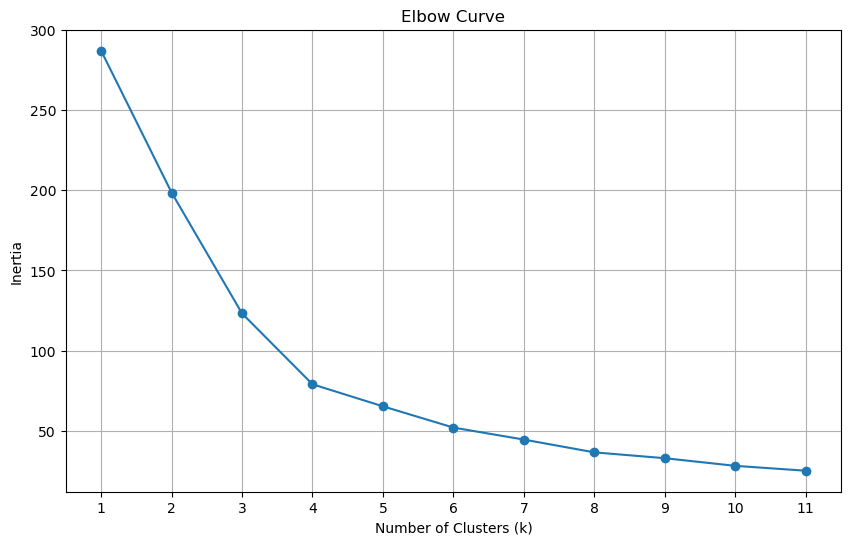

In [106]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot the line chart for inertia values
plt.figure(figsize=(10, 6))
plt.plot(df_elbow1['k'], df_elbow1['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(df_elbow['k'])
plt.grid(True)

plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [107]:
# Initialize the K-Means model using the best value for k

kmeans_model = KMeans(n_clusters = 4)


In [108]:
# Fit the K-Means model using the scaled data

kmeans_model.fit(scaled_df)


C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [109]:
# Predict the clusters to group the cryptocurrencies using the scaled data

clusters = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values.

clusters

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [110]:
# Create a copy of the DataFrame

prediction_df = df_market_data.copy()


In [111]:
# Add a new column to the DataFrame with the predicted clusters

prediction_df['predicted_cluster'] = clusters

# Display sample data

prediction_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,1
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,1
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,1
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,1
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,1
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,1
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,1


In [112]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = prediction_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",
    hover_cols=["coin_id"],
    width=800,
    height=500,
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [113]:
# Create a PCA model instance and set `n_components=3`.

pca_model = PCA(n_components=3)

In [114]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

pca_features = pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 

pca_features[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [115]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance_ratio = pca_model.explained_variance_ratio_

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance for Component {i+1}: {ratio:.4f}")

total_explained_variance = sum(explained_variance_ratio)

print(f"Total Explained Variance: {total_explained_variance:.4f}")

Explained Variance for Component 1: 0.3720
Explained Variance for Component 2: 0.3470
Explained Variance for Component 3: 0.1760
Total Explained Variance: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.50%

In [116]:
# Create a new DataFrame with the PCA data.

pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2', 'PCA3'])


# Copy the crypto names from the original data

pca_df['coin_id'] = df_market_data.index

# Set the coinid column as index

pca_df.set_index('coin_id', inplace=True)

# Display sample data

pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [117]:
# Create a list with the number of k-values from 1 to 11

k = list(range(1, 12))

k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [118]:
# Create an empty list to store the inertia values

inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model= KMeans(n_clusters=i)
    k_model.fit(pca_df)
    inertia_pca.append(k_model.inertia_)
    

C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [119]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    "k": k,
    "inertia": inertia_pca
}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow2 = pd.DataFrame(elbow_data)

df_elbow2

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.893370
6,7,21.134056
7,8,17.091637
8,9,13.593650
9,10,10.484890


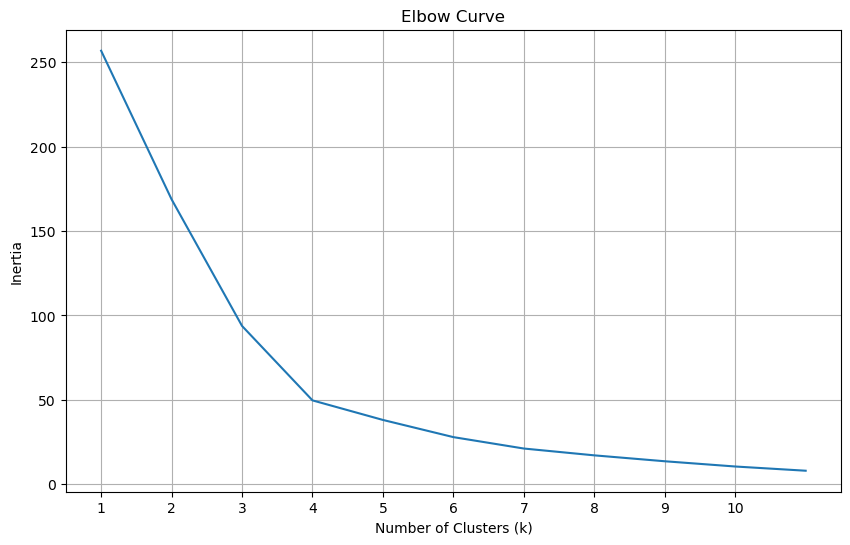

In [120]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(k, inertia_pca)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(k_values)
plt.grid(True)

plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it's same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [92]:
# Initialize the K-Means model using the best value for k

kmeans_pca = KMeans(n_clusters = 4)


In [93]:
# Fit the K-Means model using the PCA data

kmeans_pca.fit(pca_df)


C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ilun1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [95]:
# Predict the clusters to group the cryptocurrencies using the PCA data

cluster_pca = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.

cluster_pca

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1, 1, 1, 1])

In [96]:
# Create a copy of the DataFrame with the PCA data

clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters

clustered_df['cluster'] = cluster_pca

# Display sample data

clustered_df.head()


,PCA1,PCA2,PCA3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [97]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = clustered_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='cluster', 
    hover_cols=['coin_id'],  
    width=800,
    height=400
)

scatter_plot

:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

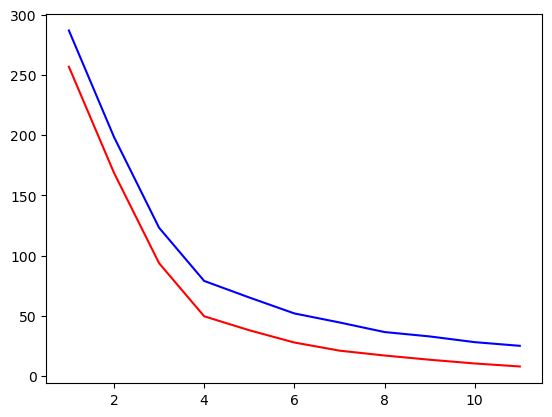

In [123]:
# Composite plot to contrast the Elbow curves

plt.plot(df_elbow1["k"], df_elbow1['inertia'], color='blue', label='Elbow 1')


plt.plot(df_elbow2["k"], df_elbow2['inertia'], color='red', label='Elbow 2')

plt.show()

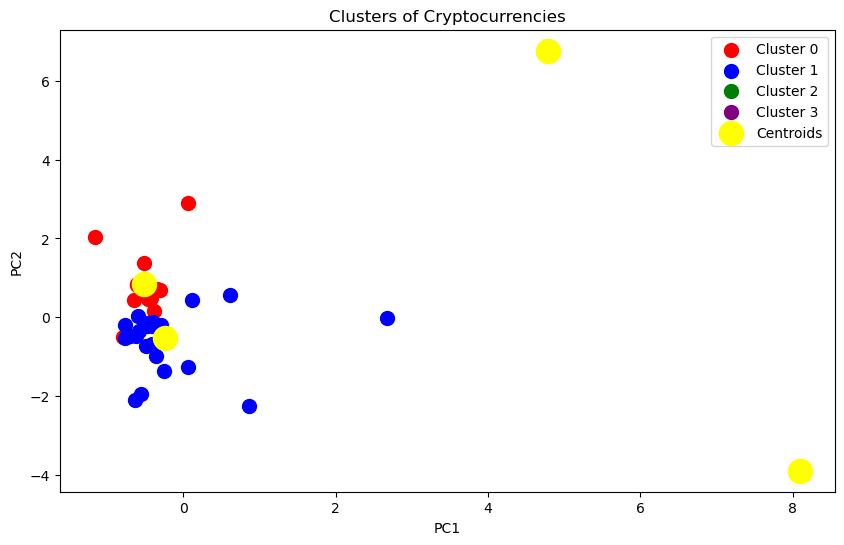

In [130]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# plt.plot(prediction_df["price_change_percentage_24h"], prediction_df['price_change_percentage_7d'], color='blue', label='prediction_df')


# plt.plot(clustered_df["PCA1"], clustered_df['PCA2'], color='red', label='clustered_df')

# plt.show()

# Plotting the clusters using PCA components PC1 and PC2
plt.figure(figsize=(10, 6))

# Plotting points for each cluster
plt.scatter(pca_df.loc[cluster_pca == 0, 'PCA1'], pca_df.loc[cluster_pca == 0, 'PCA2'], s=100, c='red', label='Cluster 0')
plt.scatter(pca_df.loc[cluster_pca == 1, 'PCA1'], pca_df.loc[cluster_pca == 1, 'PCA2'], s=100, c='blue', label='Cluster 1')
plt.scatter(pca_df.loc[cluster_pca == 2, 'PCA1'], pca_df.loc[cluster_pca == 2, 'PCA2'], s=100, c='green', label='Cluster 2')
plt.scatter(pca_df.loc[cluster_pca == 3, 'PCA1'], pca_df.loc[cluster_pca == 3, 'PCA2'], s=100, c='purple', label='Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Cryptocurrencies')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Not sure what should it be

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Could be lack of information or the quality of prediction.